# Practical Exam Project – Applied Machine Learning & Statistics

#### The dataset used in this analysis was obtained from the New York City Airbnb Open Data collection on Kaggle, originally compiled by Dmitry Gomonov (2019). It contains detailed listing information for Airbnb properties in New York City. The dataset was accessed via Kaggle at:

#### Dataset Link:- https://www.kaggle.com/datasets/dgomonov/new-york-city-airbnb-open-data

## Preprocessing  (Done by Saniya Shaikh)

## STEP 1: Imports + Data Loading

In [1]:


import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import NearestNeighbors

from scipy import stats
from scipy.stats import shapiro, ttest_ind, f_oneway
from scipy.stats import pearsonr

In [2]:
df = pd.read_csv("Data/AB_NYC_2019.csv")

print(df.shape)
df.head()


(48895, 16)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,19-10-2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,21-05-2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,05-07-2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,19-11-2018,0.10,1,0


In [3]:
df_denoised = df.copy()

## STEP 2: Basic Data Inspection 

In [4]:

df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

## STEP 3: HANDLE MISSING VALUES 

In [5]:
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)


In [6]:
df.drop(columns=['last_review'], inplace=True)


In [7]:
df['name'] = df['name'].fillna("Unknown")
df['host_name'] = df['host_name'].fillna("Unknown")


In [8]:

print("Shape of dataset:", df.shape)

print("\nMissing values per column:")
print(df.isnull().sum())

print("\nData types:")
print(df.dtypes)

df.head()


Shape of dataset: (48895, 15)

Missing values per column:
id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

Data types:
id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          objec

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [9]:
df.to_csv("AB_NYC_2019_basic_cleaned.csv", index=False)

## STEP 4: OUTLIER REMOVAL (RULE-BASED) 

In [10]:


# Remove price <= 0 or price > 1000
df = df[(df["price"] > 0) & (df["price"] <= 1000)]

# Remove unrealistic minimum_nights > 365
df = df[df["minimum_nights"] <= 365]

df.shape


(48631, 15)

## STEP 5: FEATURE ENGINEERING 

In [11]:
# Distance from Manhattan center (rough)
MAN_LAT = 40.7589
MAN_LON = -73.9851
df["dist_manhattan"] = np.sqrt(
    (df["latitude"] - MAN_LAT) ** 2 + (df["longitude"] - MAN_LON) ** 2
)


## STEP 6: Encoding Categorical Features 

In [12]:
# One-hot encode neighbourhood_group and room_type
df = pd.get_dummies(
    df,
    columns=["neighbourhood_group", "room_type"],
    drop_first=False
)

# Label encode neighbourhood (many categories)
le_neigh = LabelEncoder()
df["neighbourhood_encoded"] = le_neigh.fit_transform(df["neighbourhood"])


## STEP 7: NOISE INJECTION 

In [13]:


df_noisy = df.copy()

# 7.1 Add Gaussian noise to price (mean=0, std=0.15 * price_std)
price_std = df_noisy["price"].std()
noise = np.random.normal(loc=0, scale=0.15 * price_std, size=len(df_noisy))
df_noisy["price_noisy"] = df_noisy["price"] + noise
df_noisy["price_noisy"] = df_noisy["price_noisy"].clip(lower=1)  # avoid <=0

# 7.2 Add outliers to latitude/longitude for 5% of rows
n_outliers = int(0.05 * len(df_noisy))
outlier_idx = np.random.choice(df_noisy.index, size=n_outliers, replace=False)

df_noisy.loc[outlier_idx, "latitude"] += 0.5
df_noisy.loc[outlier_idx, "longitude"] += 0.5


## STEP 8: NOISE CLEANING & OUTLIER HANDLING 

In [ ]:
# 8.1 Smooth geographical coordinates with KNN (optional)
coords = df_noisy[["latitude", "longitude"]].values
nbrs = NearestNeighbors(n_neighbors=5).fit(coords)
distances, indices = nbrs.kneighbors(coords)

lat_smoothed = []
lon_smoothed = []

for idx_list in indices:
    lat_smoothed.append(coords[idx_list, 0].mean())
    lon_smoothed.append(coords[idx_list, 1].mean())

df_noisy["latitude_smooth"] = lat_smoothed
df_noisy["longitude_smooth"] = lon_smoothed

# 8.2 Winsorization of price_noisy (cap extremes)
lower_w = df_noisy["price_noisy"].quantile(0.01)
upper_w = df_noisy["price_noisy"].quantile(0.99)
df_noisy["price_clean"] = df_noisy["price_noisy"].clip(lower=lower_w, upper=upper_w)


In [15]:
df.to_csv("AB_NYC_2019_denoised_cleaned.csv", index=False)

## STEP 9: Comparison Plots 

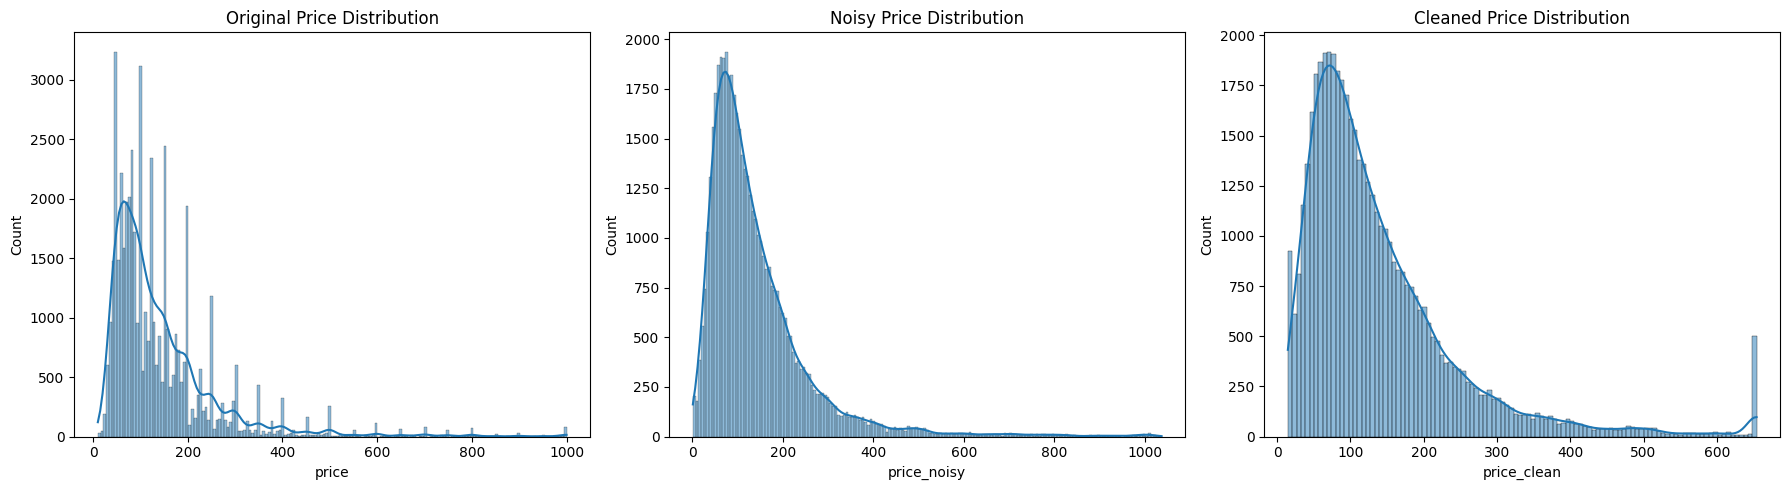

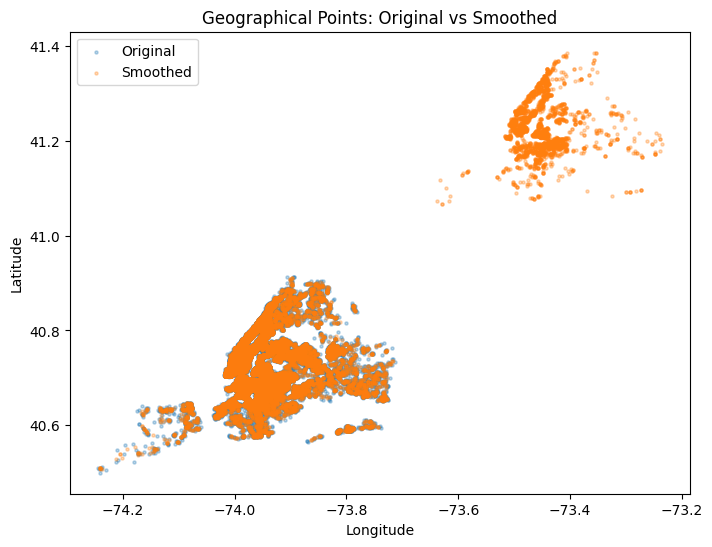

In [16]:


fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Original price
sns.histplot(df["price"], kde=True, ax=axes[0])
axes[0].set_title("Original Price Distribution")

# Noisy price
sns.histplot(df_noisy["price_noisy"], kde=True, ax=axes[1])
axes[1].set_title("Noisy Price Distribution")

# Cleaned price
sns.histplot(df_noisy["price_clean"], kde=True, ax=axes[2])
axes[2].set_title("Cleaned Price Distribution")

plt.tight_layout()
plt.show()


# Scatter: lat/long showing outlier detection (before smoothing)
plt.figure(figsize=(8, 6))
plt.scatter(df["longitude"], df["latitude"], s=5, alpha=0.3, label="Original")
plt.scatter(df_noisy["longitude_smooth"], df_noisy["latitude_smooth"],
            s=5, alpha=0.3, label="Smoothed")
plt.legend()
plt.title("Geographical Points: Original vs Smoothed")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


## STEP 10: FEATURE SCALING 

In [17]:

scaler = StandardScaler()

numeric_cols = [
    "price_clean",
    "latitude_smooth",
    "longitude_smooth",
    "minimum_nights",
    "number_of_reviews",
    "reviews_per_month",
    "calculated_host_listings_count",
    "availability_365",
    "dist_manhattan",
]



df_scaled = df_noisy.copy()
df_scaled[numeric_cols] = scaler.fit_transform(df_scaled[numeric_cols])

df_scaled.head()


,id,name,host_id,host_name,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,...,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,neighbourhood_encoded,price_noisy,latitude_smooth,longitude_smooth,price_clean
0,2539,Clean & quiet apt home by the park,2787,John,Kensington,40.64749,-73.97237,149,-0.358679,-0.321716,...,False,False,False,True,False,108,152.951317,-0.873432,-0.385597,0.119416
1,2595,Skylit Midtown Castle,2845,Jennifer,Midtown,40.75362,-73.98377,225,-0.358679,0.484812,...,False,False,True,False,False,127,234.855602,-0.005733,-0.484843,0.869294
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Harlem,40.80902,-73.94190,150,-0.234632,-0.523347,...,False,False,False,True,False,94,118.031270,0.451504,-0.124812,-0.200296
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Clinton Hill,40.68514,-73.95976,89,-0.358679,5.525606,...,False,False,True,False,False,41,70.038318,-0.562429,-0.276749,-0.639697
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,East Harlem,40.79851,-73.94399,80,0.199534,-0.321716,...,False,False,True,False,False,61,46.190807,0.364687,-0.141801,-0.858034


In [18]:
df.to_csv("AB_NYC_2019_Featured.csv", index=False)

# Descriptive Statistics (Done by Sakshi Manjrekar)

### 1. Numerical Features 

In [19]:
df_stats = pd.read_csv("AB_NYC_2019_denoised_cleaned.csv")

In [20]:
df.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,...,dist_manhattan,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,neighbourhood_encoded
0,2539,Clean & quiet apt home by the park,2787,John,Kensington,40.64749,-73.97237,149,1,9,...,0.112135,False,True,False,False,False,False,True,False,108
1,2595,Skylit Midtown Castle,2845,Jennifer,Midtown,40.75362,-73.98377,225,1,45,...,0.005445,False,False,True,False,False,True,False,False,127
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Harlem,40.80902,-73.94190,150,3,0,...,0.066168,False,False,True,False,False,False,True,False,94
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Clinton Hill,40.68514,-73.95976,89,1,270,...,0.077991,False,True,False,False,False,True,False,False,41
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,East Harlem,40.79851,-73.94399,80,10,9,...,0.057088,False,False,True,False,False,True,False,False,61


In [21]:
num_features = ["price", "number_of_reviews", "reviews_per_month",
                "availability_365", "minimum_nights", 
                "calculated_host_listings_count", "dist_manhattan"]

desc_stats = pd.DataFrame({
    "Mean": df_stats[num_features].mean(),
    "Median": df_stats[num_features].median(),
    "Std Dev": df_stats[num_features].std(),
    "Variance": df_stats[num_features].var(),
    "Skewness": df_stats[num_features].skew()
})

desc_stats

,Mean,Median,Std Dev,Variance,Skewness
price,141.312866,105.000000,116.737448,13627.631765,2.943784
number_of_reviews,23.360038,5.000000,44.636278,1992.397349,3.683413
reviews_per_month,1.094834,0.380000,1.599551,2.558563,3.296922
availability_365,112.391540,44.000000,131.403672,17266.924978,0.767841
minimum_nights,6.782937,3.000000,16.123039,259.952389,11.632297
calculated_host_listings_count,7.164216,1.000000,33.031242,1091.062977,7.915852
dist_manhattan,0.070783,0.065288,0.045713,0.002090,1.300399


### Statistical Analysis Explanations 

**Price**
- Highly right-skewed (2.94) → many low-cost listings with few expensive outliers driving up the mean ($141) above median ($105).

**Number of Reviews**
- Extremely right-skewed (3.68) → most listings have few reviews (median = 5), while popular properties accumulate hundreds.

**Reviews per Month**
- Very high skewness (3.30) → most listings receive minimal monthly reviews (median = 0.38), indicating low booking frequency.

**Availability (365)**
- Moderate positive skewness (0.77) → wide variance due to diverse host behavior, with median (44 days) suggesting selective availability.

**Minimum Nights**
- Extreme skewness (11.63) → most require short stays (median = 3 nights), but long-term rental outliers enforce 30+ night minimums.

**Calculated Host Listings Count**
- Extremely skewed (7.92) → most hosts manage single properties (median = 1), while commercial operators run dozens.

**Distance from Manhattan**
- Moderately right-skewed (1.30) → listings cluster near Manhattan center with low variance, showing geographic concentration.


### 2. Categorical Features 

In [22]:
df_stats = pd.read_csv("AB_NYC_2019_basic_cleaned.csv")

In [23]:
print(df.columns)


Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood', 'latitude',
       'longitude', 'price', 'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'dist_manhattan', 'neighbourhood_group_Bronx',
       'neighbourhood_group_Brooklyn', 'neighbourhood_group_Manhattan',
       'neighbourhood_group_Queens', 'neighbourhood_group_Staten Island',
       'room_type_Entire home/apt', 'room_type_Private room',
       'room_type_Shared room', 'neighbourhood_encoded'],
      dtype='object')


In [24]:
df_stats.columns.tolist()

['id',
 'name',
 'host_id',
 'host_name',
 'neighbourhood_group',
 'neighbourhood',
 'latitude',
 'longitude',
 'room_type',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365']

In [25]:
# Mode
neigh_mode = df_stats["neighbourhood_group"].mode()[0]
room_mode = df_stats["room_type"].mode()[0]

# Frequency
neigh_freq = df_stats["neighbourhood_group"].value_counts()
room_freq = df_stats["room_type"].value_counts()

# Summary table
categorical_summary = pd.DataFrame({
    "Mode": [neigh_mode, room_mode],
    "Most_Frequent_Count": [neigh_freq.max(), room_freq.max()]
}, index=["Neighbourhood_Group", "Room_Type"])

categorical_summary


,Mode,Most_Frequent_Count
Neighbourhood_Group,Manhattan,21661
Room_Type,Entire home/apt,25409


In [26]:
neigh_freq, room_freq

(neighbourhood_group
 Manhattan        21661
 Brooklyn         20104
 Queens            5666
 Bronx             1091
 Staten Island      373
 Name: count, dtype: int64,
 room_type
 Entire home/apt    25409
 Private room       22326
 Shared room         1160
 Name: count, dtype: int64)

### Explanation 

Most common borough: Manhattan

Most common room type: Entire home/apt

# Correlation Analysis 

In [27]:
df_stats = pd.read_csv("AB_NYC_2019_denoised_cleaned.csv")

### 1. Correlation Matrix 

In [28]:
corr_features = [
    "price",
    "number_of_reviews",
    "reviews_per_month",
    "availability_365",
    "calculated_host_listings_count",
    "dist_manhattan"
]


clean_df = df[corr_features].dropna()

In [29]:
corr_matrix = clean_df.corr(method="pearson")
corr_matrix

,price,number_of_reviews,reviews_per_month,availability_365,calculated_host_listings_count,dist_manhattan
price,1.000000,-0.057830,-0.055845,0.117925,0.130699,-0.312421
number_of_reviews,-0.057830,1.000000,0.588927,0.173757,-0.072660,0.062442
reviews_per_month,-0.055845,0.588927,1.000000,0.165762,-0.047635,0.131416
availability_365,0.117925,0.173757,0.165762,1.000000,0.226969,0.102630
calculated_host_listings_count,0.130699,-0.072660,-0.047635,0.226969,1.000000,-0.114893
dist_manhattan,-0.312421,0.062442,0.131416,0.102630,-0.114893,1.000000


### 2. Correlation with P-Values 

In [30]:
pval_matrix = pd.DataFrame(
    np.ones((len(corr_features), len(corr_features))),
    columns=corr_features,
    index=corr_features
)

for i in corr_features:
    for j in corr_features:
        r, p = pearsonr(clean_df[i].values, clean_df[j].values)
        pval_matrix.loc[i, j] = p

pval_matrix


,price,number_of_reviews,reviews_per_month,availability_365,calculated_host_listings_count,dist_manhattan
price,0.000000e+00,2.627737e-37,6.690247e-35,4.082239e-150,3.161647e-184,0.000000e+00
number_of_reviews,2.627737e-37,0.000000e+00,0.000000e+00,0.000000e+00,6.288672e-58,3.223137e-43
reviews_per_month,6.690247e-35,0.000000e+00,0.000000e+00,1.348620e-296,7.735140e-26,3.011030e-186
availability_365,4.082239e-150,0.000000e+00,1.348620e-296,0.000000e+00,0.000000e+00,5.411621e-114
calculated_host_listings_count,3.161647e-184,6.288672e-58,7.735140e-26,0.000000e+00,0.000000e+00,1.504858e-142
dist_manhattan,0.000000e+00,3.223137e-43,3.011030e-186,5.411621e-114,1.504858e-142,0.000000e+00


### Correlation Analysis Explanation 

- **Price vs dist_manhattan (-0.31)** → Strong negative correlation; listings closer to Manhattan command significantly higher prices.

- **Number_of_reviews vs reviews_per_month (0.59)** → Strong positive correlation; listings with more total reviews tend to have higher monthly review rates, indicating consistent popularity.

- **Price vs reviews_per_month (-0.056)** → Weak negative correlation; expensive listings receive slightly fewer frequent reviews, possibly due to lower booking frequency.

- **Calculated_host_listings_count vs availability_365 (0.23)** → Moderate positive correlation; hosts managing multiple properties tend to keep them available longer, suggesting professional/commercial operations.

- **Calculated_host_listings_count vs price (0.13)** → Weak positive correlation; multi-property hosts charge slightly higher prices, indicating professional pricing strategies.

- **Availability_365 vs reviews_per_month (0.17)** → Weak positive correlation; listings available more days receive more frequent reviews due to higher booking opportunities.

- **Price vs number_of_reviews (-0.058)** → Weak negative correlation; expensive listings accumulate fewer total reviews, likely due to exclusivity and lower turnover.

### **Summary:**
Location (distance from Manhattan) is the strongest predictor of price, while review metrics show strong internal correlation but weak influence on pricing.


# Statistical Visualizations 

In [31]:
df_stats = pd.read_csv("AB_NYC_2019_denoised_cleaned.csv")

### Plot 1. Correlation Heatmap 

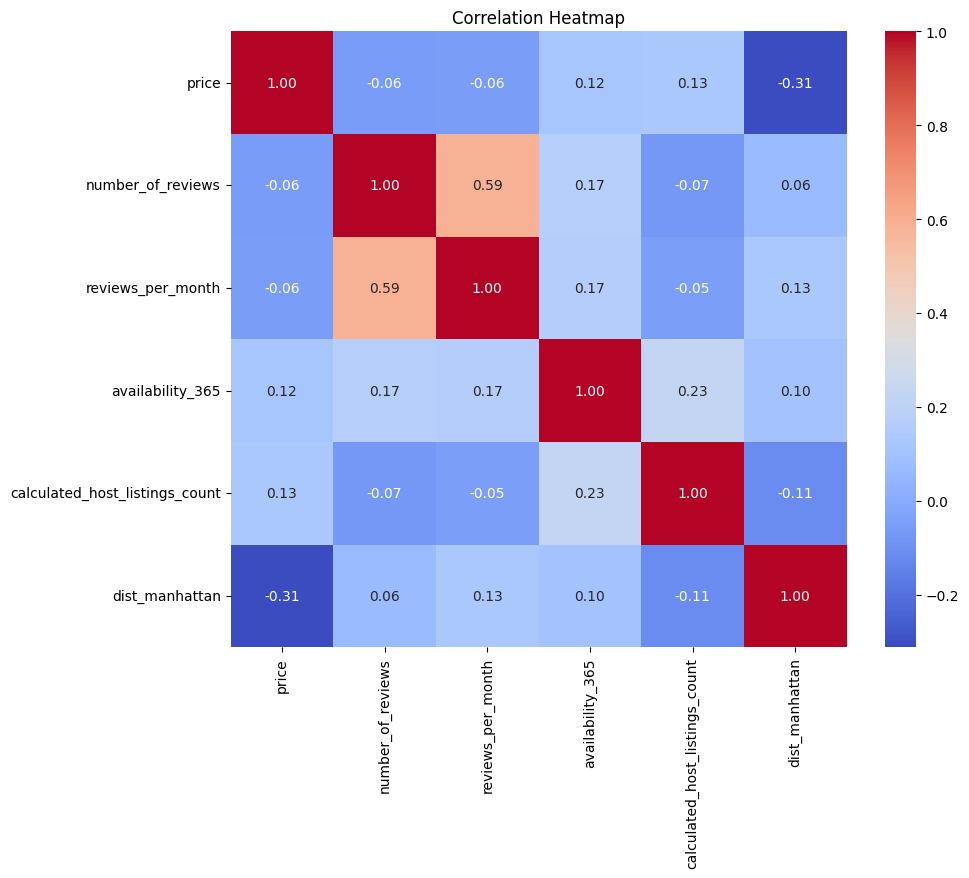

In [32]:
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    square=True
)
plt.title("Correlation Heatmap")
plt.show()

The correlation heatmap shows generally weak linear relationships among the features, with a moderate positive association between reviews per month and total reviews. Other correlations with price and location are mild, indicating that no single feature has a strong linear effect on price in this subset.

### Plot 2. Price Distribution - Histogram + KDE 

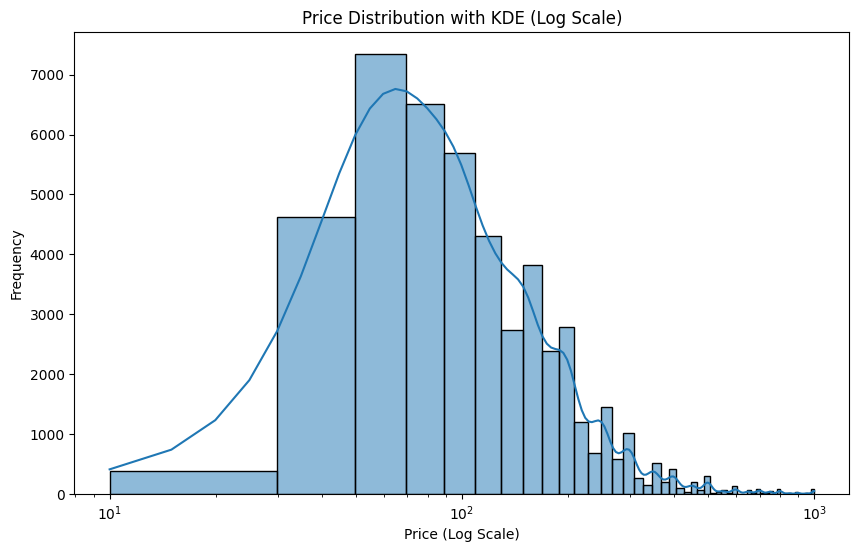

In [33]:
plt.figure(figsize=(10,6))

sns.histplot(
    data=df_stats[df_stats["price"] > 0],
    x="price",
    bins=50,
    kde=True
)

plt.xscale("log")

plt.title("Price Distribution with KDE (Log Scale)")
plt.xlabel("Price (Log Scale)")
plt.ylabel("Frequency")

plt.show()


The price distribution is strongly right‑skewed, with many low‑priced listings and a long tail of high prices, even after log scaling. This visualization highlights that most Airbnb listings cluster at lower price levels, while a smaller number extend into much higher price ranges.

### Plot 3. Boxplot - Price Across Boroughs 

In [34]:
df_denoised = pd.read_csv("AB_NYC_2019_denoised_cleaned.csv")
print(df_denoised.columns)

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood', 'latitude',
       'longitude', 'price', 'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'dist_manhattan', 'neighbourhood_group_Bronx',
       'neighbourhood_group_Brooklyn', 'neighbourhood_group_Manhattan',
       'neighbourhood_group_Queens', 'neighbourhood_group_Staten Island',
       'room_type_Entire home/apt', 'room_type_Private room',
       'room_type_Shared room', 'neighbourhood_encoded'],
      dtype='object')


In [35]:
borough_cols = [
    "neighbourhood_group_Brooklyn",
    "neighbourhood_group_Manhattan",
    "neighbourhood_group_Queens",
    "neighbourhood_group_Staten Island"
]

# Create borough column from encoded variables
df_denoised["borough"] = df_denoised[borough_cols].idxmax(axis=1)
df_denoised["borough"] = df_denoised["borough"].str.replace("neighbourhood_group_", "")

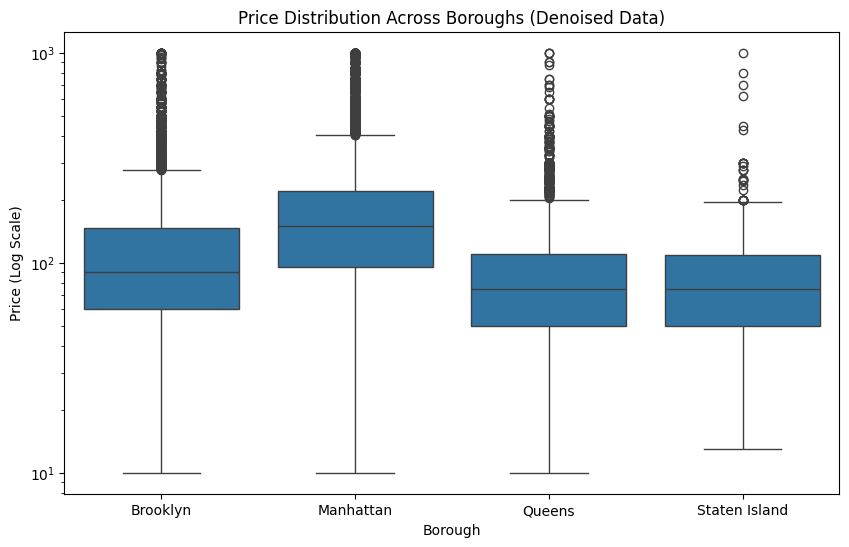

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))

sns.boxplot(
    data=df_denoised,
    x="borough",
    y="price"
)

plt.yscale("log")  # Important for skewed price distribution

plt.title("Price Distribution Across Boroughs (Denoised Data)")
plt.xlabel("Borough")
plt.ylabel("Price (Log Scale)")

plt.show()

 The boxplot shows clear differences in Airbnb prices across boroughs, with Manhattan having the widest range and highest median prices, followed by Brooklyn. This indicates a greater prevalence of expensive listings in Manhattan and higher overall price variability across boroughs.

### Plot 4. Barplot 

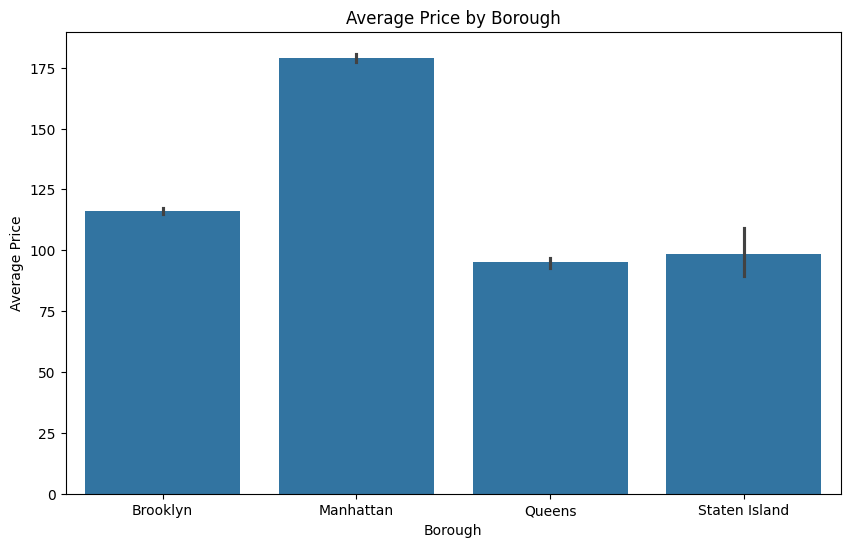

In [37]:
plt.figure(figsize=(10,6))

sns.barplot(
    data=df_denoised,
    x="borough",
    y="price",
    estimator="mean"
)

plt.title("Average Price by Borough")
plt.xlabel("Borough")
plt.ylabel("Average Price")

plt.show()

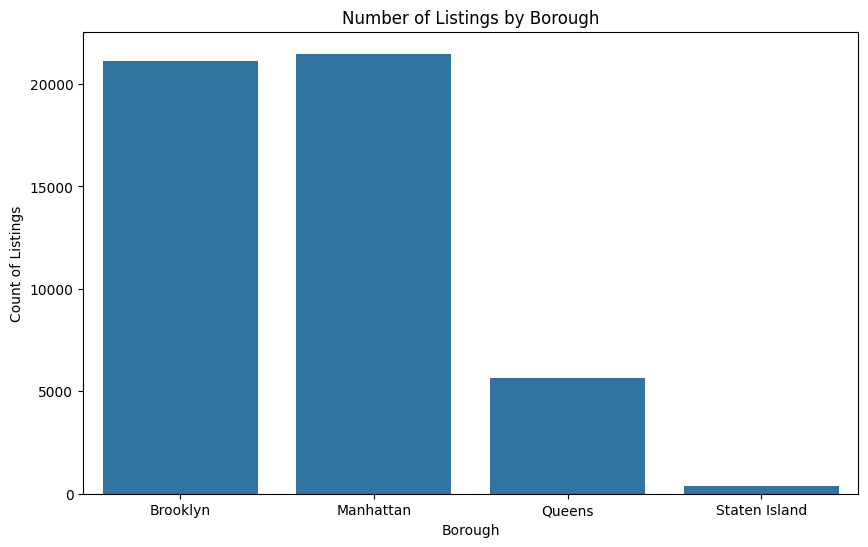

In [38]:
plt.figure(figsize=(10,6))

sns.countplot(
    data=df_denoised,
    x="borough"
)

plt.title("Number of Listings by Borough")
plt.xlabel("Borough")
plt.ylabel("Count of Listings")

plt.show()

The bar chart shows Manhattan with the clearly highest average price among NYC boroughs, followed by Brooklyn and Queens. Meanwhile, Brooklyn has the most listings, highlighting the strong impact of location on pricing while the city has uneven listing distribution across boroughs.

### Plot 5. Scatter Plot 

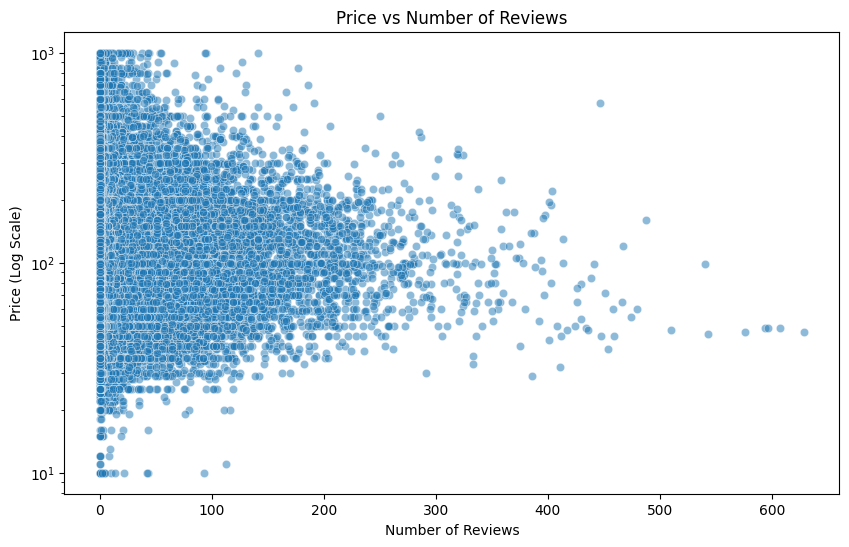

In [39]:
plt.figure(figsize=(10,6))

sns.scatterplot(
    data=df_denoised,
    x="number_of_reviews",
    y="price",
    alpha=0.5
)

plt.yscale("log")  # Recommended due to skewed price

plt.title("Price vs Number of Reviews")
plt.xlabel("Number of Reviews")
plt.ylabel("Price (Log Scale)")

plt.show()

The scatter plot shows a slight negative relationship between price and number of reviews, suggesting that lower-priced listings tend to receive more reviews. However, the relationship is weak, indicating that other factors also influence pricing.

## Price Insights 

The plot shows weak linear relationships, indicating other factors influence price.
- 	Location strongly impacts price—Manhattan has highest prices.
- 	Room type has strong effect—entire homes cost most.
- 	Reviews per month has slight positive relationship with price.
- 	Price distribution is positively skewed.
		Feature Selection Recommendations

## Feature Importance from EDA 

Based on statistical analysis for predictive modeling, the following recommendations:
- Strong predictors: location, room type.
- Moderate counts: number of reviews, availability, reviews per month.
- Consider transforming price and minimum nights due to skewness.

# Unsupervised Learning (Done by Hadassah Mercy)

## Objective
In this section, we apply **K-Means Clustering** to segment Airbnb listings into meaningful groups based on pricing, availability, reviews, and geographic location.

### Features Used for Clustering:
- price
- number_of_reviews
- availability_365
- minimum_nights
- latitude
- longitude

All features are scaled before clustering.


### Import required libraries

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

sns.set(style="whitegrid")


## Step 1: Select Features for Clustering
We extract numerical features relevant to pricing behavior and geographic distribution.


## Feature Selection (Select clustering features)

In [41]:
features = ['price', 'number_of_reviews', 'availability_365',
            'minimum_nights', 'latitude', 'longitude']

X = df[features]

X.head()

,price,number_of_reviews,availability_365,minimum_nights,latitude,longitude
0,149,9,365,1,40.64749,-73.97237
1,225,45,355,1,40.75362,-73.98377
2,150,0,365,3,40.80902,-73.94190
3,89,270,194,1,40.68514,-73.95976
4,80,9,0,10,40.79851,-73.94399


## Step 2: Feature Scaling

Since K-Means is distance-based, we standardize the features using StandardScaler.


In [42]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame for readability
X_scaled_df = pd.DataFrame(X_scaled, columns=features)
X_scaled_df.head()


,price,number_of_reviews,availability_365,minimum_nights,latitude,longitude
0,0.065850,-0.321716,1.922405,-0.358679,-1.492501,-0.440141
1,0.716891,0.484812,1.846303,-0.358679,0.452298,-0.687053
2,0.074417,-0.523347,1.922405,-0.234632,1.467486,0.219809
3,-0.448129,5.525606,0.621058,-0.358679,-0.802577,-0.167021
4,-0.525226,-0.321716,-0.855324,0.199534,1.274894,0.174542


All features were standardized using StandardScaler to ensure equal contribution during distance-based clustering.


## Step 3: Determine Optimal Number of Clusters (Elbow Method)

We test k values from 2 to 10 and analyze inertia to determine the optimal number of clusters.


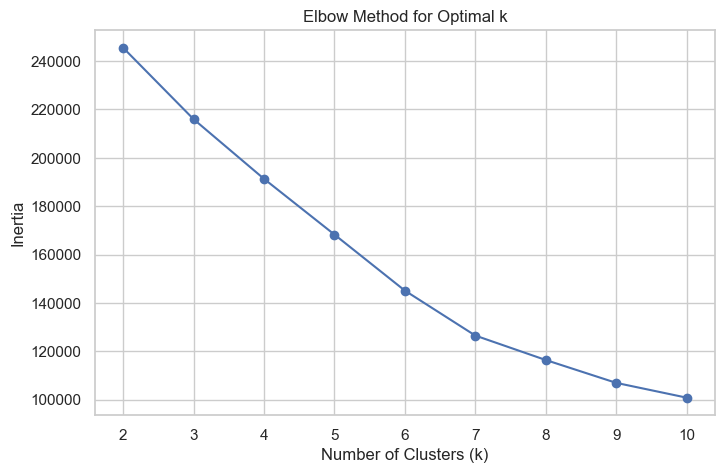

In [43]:
inertia = []
k_values = range(2, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(8,5))
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()


### Optimal k Selection

Although the elbow curve shows gradual improvement up to k = 6,
we select k = 4 for better business interpretability and meaningful
market segmentation (Luxury, Budget, Mid-range, Private rooms).

This choice balances model complexity and practical insights.



In [44]:
# Apply KMeans with k=4
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df['cluster'] = kmeans.fit_predict(X_scaled)

df[['price', 'cluster']].head()


,price,cluster
0,149,0
1,225,0
2,150,0
3,89,2
4,80,3


## Step 4: Cluster Profile Analysis

We calculate the mean values of features per cluster to understand their characteristics.


In [45]:
cluster_profile = df.groupby('cluster')[features].mean()
cluster_profile

,price,number_of_reviews,availability_365,minimum_nights,latitude,longitude
cluster,,,,,,
0,215.754110,14.069761,281.317558,15.518485,40.721560,-73.967152
1,131.539818,11.083536,27.494107,4.327123,40.705919,-73.964943
2,121.248268,151.006096,183.174841,2.830701,40.721425,-73.948628
3,93.608799,16.494924,98.147444,4.475624,40.787440,-73.910750


## Step 5: Geographic Visualization of Clusters
We visualize how clusters are distributed across NYC.


### Geographic Scatter Plot

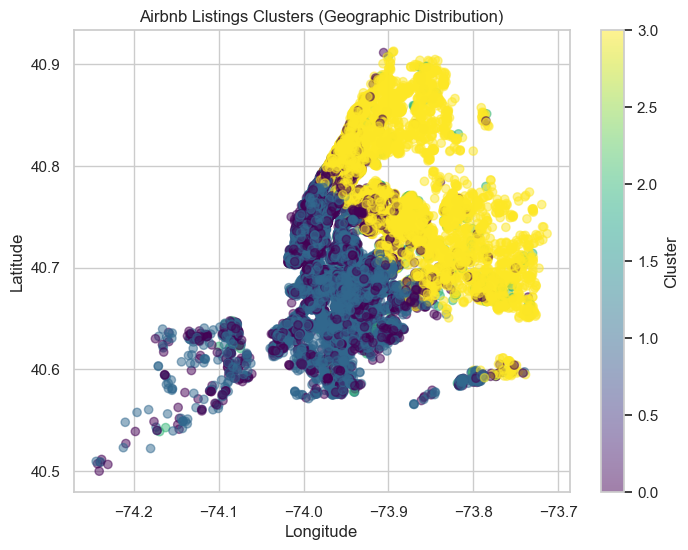

In [46]:
plt.figure(figsize=(8,6))
plt.scatter(df['longitude'], df['latitude'],
            c=df['cluster'], cmap='viridis', alpha=0.5)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Airbnb Listings Clusters (Geographic Distribution)')
plt.colorbar(label='Cluster')
plt.show()


## Step 6: Price Distribution by Cluster


### Boxplot

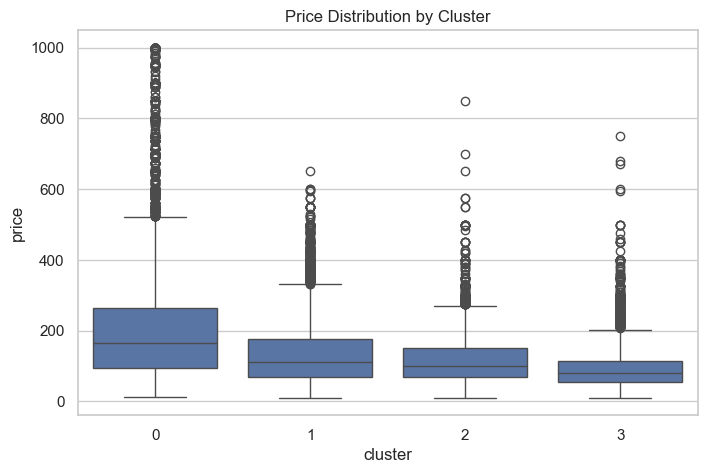

In [47]:
plt.figure(figsize=(8,5))
sns.boxplot(x='cluster', y='price', data=df)
plt.title('Price Distribution by Cluster')
plt.show()


## Price Distribution by Cluster

The boxplot shows clear price differences across the four clusters.

- **Cluster 0** has the highest median price and the greatest variability, indicating higher-priced listings.
- **Clusters 1 and 2** fall in the mid-price range, with moderate spread and some high-value outliers.
- **Cluster 3** has the lowest median price, representing more affordable listings.

The presence of outliers in all clusters suggests that while most listings follow typical price patterns, some premium properties exist within each group.

Overall, the clustering effectively separates listings into distinct pricing tiers.


## Step 7: Reviews vs Price by Cluster

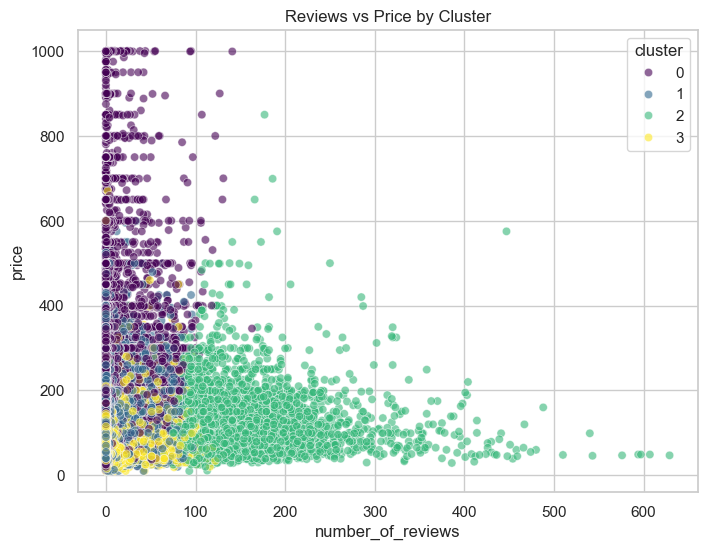

In [48]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='number_of_reviews',
                y='price',
                hue='cluster',
                data=df,
                palette='viridis',
                alpha=0.6)

plt.title('Reviews vs Price by Cluster')
plt.show()

## Step 8: Business Insights

### Cluster 0 — Premium Listings ($215 avg)
High-priced properties ($200-250) with long minimum stays (15 nights) and exceptional availability (281 days/year). Target professional property managers and extended-stay guests.


### Cluster 1 — Mid-Range Plus ($132 avg)
Mid-high priced listings ($130-140) with extremely low availability (27 days/year) indicating high booking frequency. Most in-demand category despite moderate pricing.

### Cluster 2 — Mid-Range Standard ($121 avg)
Moderate-priced listings ($120-130) with highest popularity (151 reviews average). The "sweet spot" of NYC Airbnb with balanced pricing and proven guest satisfaction.

### Cluster 3 — Budget Listings ($94 avg)
Most affordable properties ($90-100) with short minimum stays (4-5 nights) and moderate availability (98 days/year). Targets price-sensitive travelers.


In [49]:
# Convert cluster to dummy variables
df = pd.get_dummies(df, columns=['cluster'], drop_first=False)

df.head()


,id,name,host_id,host_name,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,...,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,neighbourhood_encoded,cluster_0,cluster_1,cluster_2,cluster_3
0,2539,Clean & quiet apt home by the park,2787,John,Kensington,40.64749,-73.97237,149,1,9,...,False,False,False,True,False,108,True,False,False,False
1,2595,Skylit Midtown Castle,2845,Jennifer,Midtown,40.75362,-73.98377,225,1,45,...,False,False,True,False,False,127,True,False,False,False
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Harlem,40.80902,-73.94190,150,3,0,...,False,False,False,True,False,94,True,False,False,False
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Clinton Hill,40.68514,-73.95976,89,1,270,...,False,False,True,False,False,41,False,False,True,False
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,East Harlem,40.79851,-73.94399,80,10,9,...,False,False,True,False,False,61,False,False,False,True


## Step 9: Export K-Means Clustered Dataset

We save the dataset including the cluster labels into a CSV file for further analysis, reporting, or visualization in external tools.


In [50]:
output_file = "airbnb_nyc_kmeans_clustered.csv"
df.to_csv(output_file, index=False)

print(f"Dataset successfully saved as {output_file}")


Dataset successfully saved as airbnb_nyc_kmeans_clustered.csv


# Supervised Learning (Done by Shruti Bhandari)

## Step 1: Import Libraries

In [51]:
import sys
!{sys.executable} -m pip install xgboost --quiet

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, classification_report
import xgboost as xgb
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')

## Step 2: Import Dataset

In [53]:
# Load the clustered dataset
df_clustered = pd.read_csv('airbnb_nyc_kmeans_clustered.csv')

In [54]:
print(f"\nDataset shape: {df_clustered.shape}")
df_clustered.head()


Dataset shape: (48631, 27)


,id,name,host_id,host_name,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,...,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,neighbourhood_encoded,cluster_0,cluster_1,cluster_2,cluster_3
0,2539,Clean & quiet apt home by the park,2787,John,Kensington,40.64749,-73.97237,149,1,9,...,False,False,False,True,False,108,True,False,False,False
1,2595,Skylit Midtown Castle,2845,Jennifer,Midtown,40.75362,-73.98377,225,1,45,...,False,False,True,False,False,127,True,False,False,False
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Harlem,40.80902,-73.94190,150,3,0,...,False,False,False,True,False,94,True,False,False,False
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Clinton Hill,40.68514,-73.95976,89,1,270,...,False,False,True,False,False,41,False,False,True,False
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,East Harlem,40.79851,-73.94399,80,10,9,...,False,False,True,False,False,61,False,False,False,True


## Step 3: Prepare Dataset for Model Training

In [55]:
# Convert one-hot encoded cluster columns to single 'cluster' column
cluster_cols = ['cluster_0', 'cluster_1', 'cluster_2', 'cluster_3']

# Find which cluster column is True for each row
df_clustered['cluster'] = df_clustered[cluster_cols].idxmax(axis=1).str.replace('cluster_', '').astype(int)

print("\nConverted one-hot encoded clusters to single 'cluster' column")

# Check cluster distribution
print(f"\nCluster distribution:")
print(df_clustered['cluster'].value_counts().sort_index())


Converted one-hot encoded clusters to single 'cluster' column

Cluster distribution:
cluster
0    11009
1    23080
2     3609
3    10933
Name: count, dtype: int64


In [56]:
df_clustered.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,...,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,neighbourhood_encoded,cluster_0,cluster_1,cluster_2,cluster_3,cluster
0,2539,Clean & quiet apt home by the park,2787,John,Kensington,40.64749,-73.97237,149,1,9,...,False,False,True,False,108,True,False,False,False,0
1,2595,Skylit Midtown Castle,2845,Jennifer,Midtown,40.75362,-73.98377,225,1,45,...,False,True,False,False,127,True,False,False,False,0
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Harlem,40.80902,-73.94190,150,3,0,...,False,False,True,False,94,True,False,False,False,0
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Clinton Hill,40.68514,-73.95976,89,1,270,...,False,True,False,False,41,False,False,True,False,2
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,East Harlem,40.79851,-73.94399,80,10,9,...,False,True,False,False,61,False,False,False,True,3


In [57]:
# Analyze cluster characteristics
print("\n" + "=" * 70)
print("CLUSTER CHARACTERISTICS (Price Categories)")
print("=" * 70)
cluster_summary = df_clustered.groupby('cluster').agg({
    'price': ['mean', 'median', 'min', 'max', 'count'],
    'number_of_reviews': 'mean',
    'availability_365': 'mean',
    'minimum_nights': 'mean'
}).round(2)

print(cluster_summary)


CLUSTER CHARACTERISTICS (Price Categories)
          price                         number_of_reviews availability_365  \
           mean median min   max  count              mean             mean   
cluster                                                                      
0        215.75  165.0  12  1000  11009             14.07           281.32   
1        131.54  110.0  10   650  23080             11.08            27.49   
2        121.25  100.0  10   850   3609            151.01           183.17   
3         93.61   80.0  10   750  10933             16.49            98.15   

        minimum_nights  
                  mean  
cluster                 
0                15.52  
1                 4.33  
2                 2.83  
3                 4.48  


## Step 4: Defining Cluster Labels

BUSINESS INSIGHTS - CLUSTER DEFINITIONS

 Cluster 0 — Premium Listings
   High price ($200-250), long-term stays, high availability

 Cluster 1 — Mid-Range Plus
   Mid-high price ($130-140), low availability, high turnover

 Cluster 2 — Mid-Range Standard
   Mid price ($120-130), very popular, balanced availability

 Cluster 3 — Budget Listings
   Low price ($90-100), moderate availability, short stays


Price Category Distribution:

-------------------------------
price_category
Mid-Range Plus        23080
Premium Listings      11009
Budget Listings       10933
Mid-Range Standard     3609
Name: count, dtype: int64




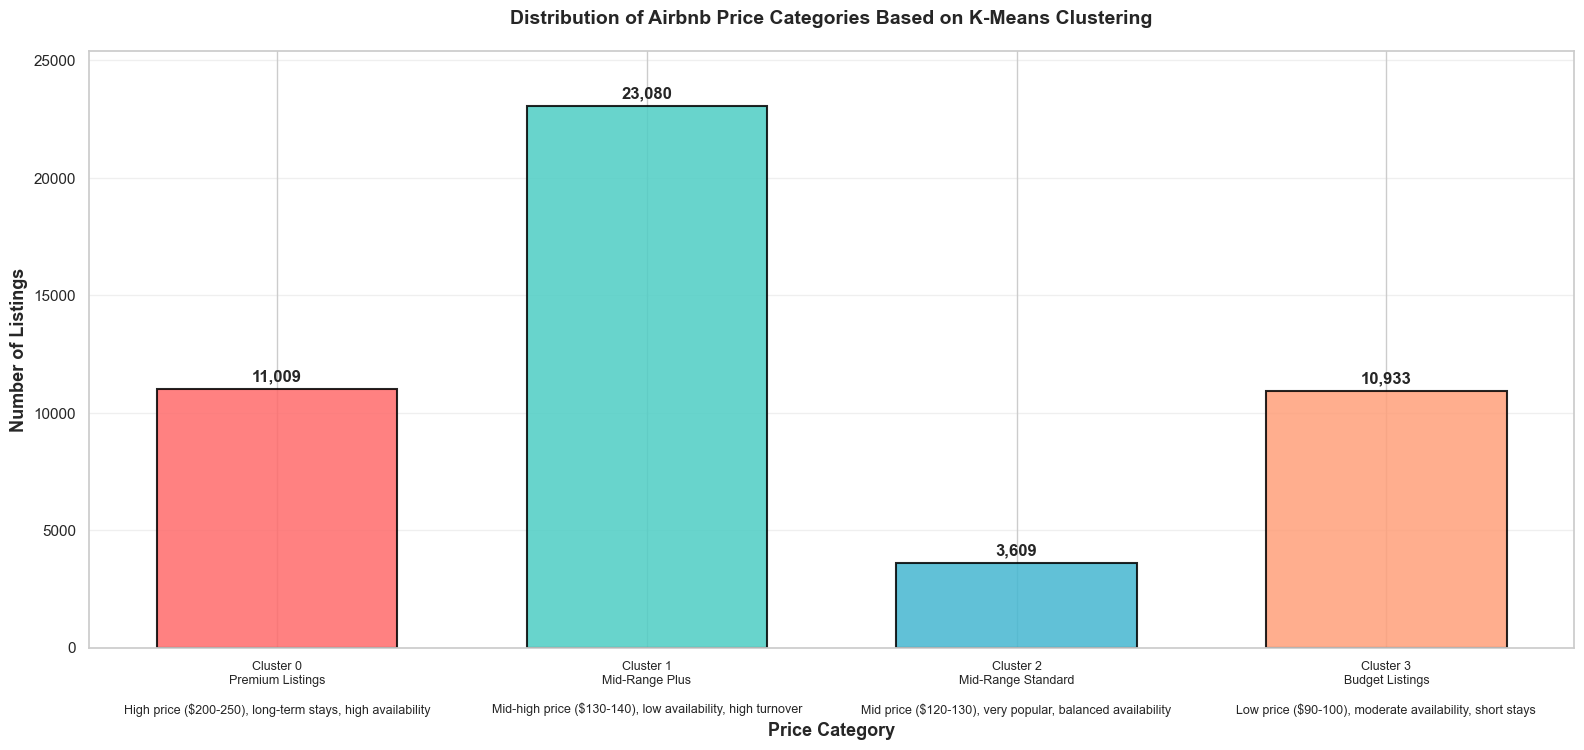

In [58]:
cluster_names = {
    0: 'Premium Listings',           # ~$216 avg
    1: 'Mid-Range Plus',             # ~$132 avg
    2: 'Mid-Range Standard',         # ~$121 avg
    3: 'Budget Listings'             # ~$94 avg
}

cluster_descriptions = {
    0: 'High price ($200-250), long-term stays, high availability',
    1: 'Mid-high price ($130-140), low availability, high turnover',
    2: 'Mid price ($120-130), very popular, balanced availability',
    3: 'Low price ($90-100), moderate availability, short stays'
}

# Create a new column with category names
df_clustered['price_category'] = df_clustered['cluster'].map(cluster_names)

print("BUSINESS INSIGHTS - CLUSTER DEFINITIONS")
for cluster_id in range(4):
    print(f"\n Cluster {cluster_id} — {cluster_names[cluster_id]}")
    print(f"   {cluster_descriptions[cluster_id]}")

print("\n")
print("Price Category Distribution:")
print("\n"+ "-------------------------------")
print(df_clustered['price_category'].value_counts())
print("\n")


# Visualize cluster distribution with labels
fig, ax = plt.subplots(figsize=(16, 8))
cluster_counts = df_clustered['cluster'].value_counts().sort_index()

bars = ax.bar(range(4), cluster_counts.values, 
              color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A'], 
              edgecolor='black', linewidth=1.5, alpha=0.85, width=0.65)

# Add count labels
for i, (bar, count) in enumerate(zip(bars, cluster_counts.values)):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 200,
            f'{count:,}', ha='center', va='bottom', fontsize=12, fontweight='bold')

ax.set_xlabel('Price Category', fontsize=13, fontweight='bold')
ax.set_ylabel('Number of Listings', fontsize=13, fontweight='bold')
ax.set_title('Distribution of Airbnb Price Categories Based on K-Means Clustering', 
             fontsize=14, fontweight='bold', pad=20)

# Custom x-axis with cluster name and description
x_labels = []
for i in range(4):
    label = f"Cluster {i}\n{cluster_names[i]}\n\n{cluster_descriptions[i]}"
    x_labels.append(label)

ax.set_xticks(range(4))
ax.set_xticklabels(x_labels, fontsize=9, ha='center', wrap=True)

plt.grid(axis='y', alpha=0.3)
plt.ylim(0, max(cluster_counts.values) * 1.1)
plt.tight_layout()
plt.subplots_adjust(bottom=0.18)  # Make room for descriptions
plt.show()



## Step 5: Prepare Features and Target

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Select features for classification (excluding cluster and ID columns)
feature_cols = ['number_of_reviews', 'availability_365', 'minimum_nights', 
                'latitude', 'longitude', 'calculated_host_listings_count',
                'neighbourhood_group_Bronx', 'neighbourhood_group_Brooklyn',
                'neighbourhood_group_Manhattan', 'neighbourhood_group_Queens',
                'neighbourhood_group_Staten Island', 'room_type_Entire home/apt', 
                'room_type_Private room', 'room_type_Shared room', 'dist_manhattan']

# Features and target
X = df_clustered[feature_cols].copy()
y = df_clustered['cluster'].copy()

## Step 6: Train-Test Split

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Train set size:", X_train.shape)
print("Test set size:", X_test.shape)
print("\nTarget distribution in train set:")
print(y_train.value_counts())
print("\nTarget distribution in test set:")
print(y_test.value_counts())

Train set size: (38904, 15)
Test set size: (9727, 15)

Target distribution in train set:
cluster
1    18464
0     8807
3     8746
2     2887
Name: count, dtype: int64

Target distribution in test set:
cluster
1    4616
0    2202
3    2187
2     722
Name: count, dtype: int64


## Step 7: Feature Scaling

In [61]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nScaling completed")



Scaling completed


## Step 8: Model Training 

### 8.1: Random Forest Classifier

In [62]:
print("="*60)
print("TRAINING MODEL 1: RANDOM FOREST CLASSIFIER")
print("="*60)

rf_model = RandomForestClassifier(n_estimators=100, max_depth=15, 
                                   min_samples_split=10, min_samples_leaf=5,
                                   random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)

print("\nModel trained!")
# Predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluation
acc_rf = accuracy_score(y_test, y_pred_rf)
prec_rf = precision_score(y_test, y_pred_rf, average='weighted', zero_division=0)
rec_rf = recall_score(y_test, y_pred_rf, average='weighted', zero_division=0)
f1_rf = f1_score(y_test, y_pred_rf, average='weighted', zero_division=0)

print(f"\nPERFORMANCE METRICS:")
print(f"  Accuracy:  {acc_rf:.4f} ({acc_rf*100:.2f}%)")
print(f"  Precision: {prec_rf:.4f}")
print(f"  Recall:    {rec_rf:.4f}")
print(f"  F1-Score:  {f1_rf:.4f}")


TRAINING MODEL 1: RANDOM FOREST CLASSIFIER

Model trained!

PERFORMANCE METRICS:
  Accuracy:  0.9574 (95.74%)
  Precision: 0.9574
  Recall:    0.9574
  F1-Score:  0.9572


### 8.2: XGBoost Classifier

In [63]:
print("="*60)
print("TRAINING MODEL 2: XGBOOST CLASSIFIER")
print("="*60)


# XGBoost with optimized hyperparameters
xgb_model = XGBClassifier(
    n_estimators=100,           # Number of boosting rounds
    max_depth=8,                # Maximum tree depth
    learning_rate=0.1,          # Step size shrinkage
    subsample=0.8,              # Subsample ratio of training instances
    colsample_bytree=0.8,       # Subsample ratio of columns
    objective='multi:softmax',  # Multiclass classification
    num_class=4,                # Number of classes
    eval_metric='mlogloss',     # Evaluation metric
    random_state=42,
    n_jobs=-1,
    verbosity=0                 # Suppress warnings
)

xgb_model.fit(X_train, y_train)

print("\nModel trained!")

# Predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluation
acc_xgb = accuracy_score(y_test, y_pred_xgb)
prec_xgb = precision_score(y_test, y_pred_xgb, average='weighted', zero_division=0)
rec_xgb = recall_score(y_test, y_pred_xgb, average='weighted', zero_division=0)
f1_xgb = f1_score(y_test, y_pred_xgb, average='weighted', zero_division=0)

print(f"\nPERFORMANCE METRICS:")
print(f"  Accuracy:  {acc_xgb:.4f} ({acc_xgb*100:.2f}%)")
print(f"  Precision: {prec_xgb:.4f}")
print(f"  Recall:    {rec_xgb:.4f}")
print(f"  F1-Score:  {f1_xgb:.4f}")


TRAINING MODEL 2: XGBOOST CLASSIFIER

Model trained!

PERFORMANCE METRICS:
  Accuracy:  0.9620 (96.20%)
  Precision: 0.9619
  Recall:    0.9620
  F1-Score:  0.9618


## Step 9: Model Evaluation (Comparison between Random Forest vs XGBoost)

In [64]:
results_df = pd.DataFrame({
    'Model': ['Random Forest', 'XGBoost'],
    'Accuracy': [acc_rf, acc_xgb],
    'Precision': [prec_rf, prec_xgb],
    'Recall': [rec_rf, rec_xgb],
    'F1-Score': [f1_rf, f1_xgb],
})

# Sort by accuracy
results_df = results_df.sort_values('Accuracy', ascending=False).reset_index(drop=True)

print("="*65)
print("MODEL PERFORMANCE COMPARISON: Random Forest vs XGBoost")
print("="*65)
print("\n" + results_df.to_string(index=False))
print("-"*65)
print(f"Best Model: {results_df.iloc[0]['Model']}")
print(f"Best Accuracy: {results_df.iloc[0]['Accuracy']:.4f} ({results_df.iloc[0]['Accuracy']*100:.2f}%)")


MODEL PERFORMANCE COMPARISON: Random Forest vs XGBoost

        Model  Accuracy  Precision   Recall  F1-Score
      XGBoost  0.961962   0.961920 0.961962  0.961797
Random Forest  0.957438   0.957442 0.957438  0.957230
-----------------------------------------------------------------
Best Model: XGBoost
Best Accuracy: 0.9620 (96.20%)


## Step 10: Confusion Matrix (XGBoost)

In [65]:
print("="*50)
print("Confusion Matrix - Test Set")
print("="*50)
cm = confusion_matrix(y_test, y_pred_xgb)
print(cm)

print("\nInterpretation (4-Class Classification):")
print("-"*50)

# For each cluster
for i in range(4):
    print(f"\nCluster {i} - {cluster_names[i]}:")
    
    # True Positives: Correctly predicted as class i
    true_positives = cm[i][i]
    
    # False Negatives: Actually class i but predicted as other classes
    false_negatives = sum(cm[i]) - cm[i][i]
    
    # False Positives: Actually other classes but predicted as class i
    false_positives = sum(cm[j][i] for j in range(4)) - cm[i][i]
    
    # True Negatives: Actually other classes AND correctly predicted as other classes
    true_negatives = np.sum(cm) - (sum(cm[i]) + sum(cm[j][i] for j in range(4)) - cm[i][i])
    
    print(f"  True Positives (Correct):     {true_positives}")
    print(f"  False Negatives (Missed):     {false_negatives}")
    print(f"  False Positives (Wrong):      {false_positives}")
    print(f"  True Negatives (Correct Non): {true_negatives}")
    
    # Accuracy for this class
    accuracy = cm[i][i] / sum(cm[i]) if sum(cm[i]) > 0 else 0
    print(f"  Class Accuracy:               {accuracy:.4f} ({accuracy*100:.1f}%)")

print("\n" + "="*50)
print(f"Overall Accuracy: {np.trace(cm)/np.sum(cm):.4f} ({np.trace(cm)/np.sum(cm)*100:.1f}%)")
print(f"Total Correct: {np.trace(cm)}/{np.sum(cm)}")
print("="*50)


Confusion Matrix - Test Set
[[2017  124    9   52]
 [  47 4526    4   39]
 [  11    6  698    7]
 [  31   34    6 2116]]

Interpretation (4-Class Classification):
--------------------------------------------------

Cluster 0 - Premium Listings:
  True Positives (Correct):     2017
  False Negatives (Missed):     185
  False Positives (Wrong):      89
  True Negatives (Correct Non): 7436
  Class Accuracy:               0.9160 (91.6%)

Cluster 1 - Mid-Range Plus:
  True Positives (Correct):     4526
  False Negatives (Missed):     90
  False Positives (Wrong):      164
  True Negatives (Correct Non): 4947
  Class Accuracy:               0.9805 (98.1%)

Cluster 2 - Mid-Range Standard:
  True Positives (Correct):     698
  False Negatives (Missed):     24
  False Positives (Wrong):      19
  True Negatives (Correct Non): 8986
  Class Accuracy:               0.9668 (96.7%)

Cluster 3 - Budget Listings:
  True Positives (Correct):     2116
  False Negatives (Missed):     71
  False Positives

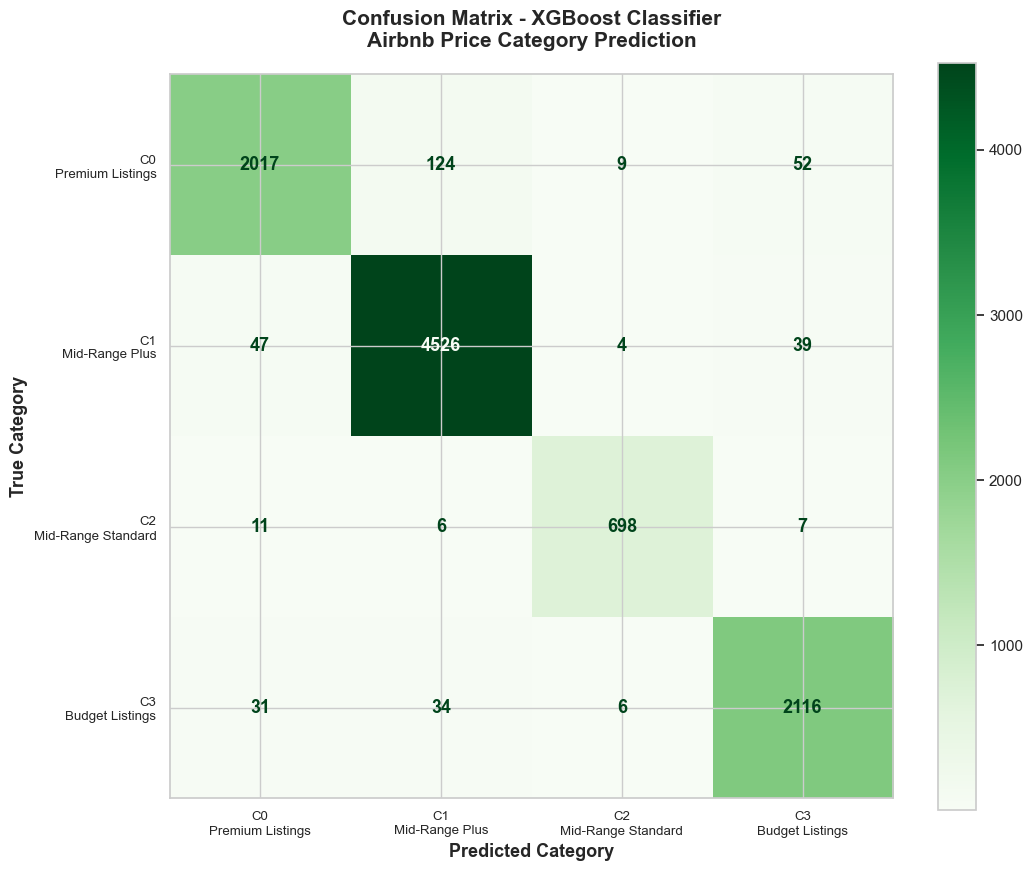

In [66]:
# Import required for visualization
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# === VISUALIZATION ===
fig, ax = plt.subplots(figsize=(11, 9))

# Create display with your cluster names
display_labels = [f"C{i}\n{cluster_names[i]}" for i in range(4)]
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=display_labels)
disp.plot(cmap='Greens', ax=ax, values_format='d', colorbar=True,
          text_kw={'fontsize': 13, 'fontweight': 'bold'})

# Customize
ax.set_title('Confusion Matrix - XGBoost Classifier\nAirbnb Price Category Prediction', 
             fontsize=15, fontweight='bold', pad=20)
ax.set_xlabel('Predicted Category', fontsize=13, fontweight='bold')
ax.set_ylabel('True Category', fontsize=13, fontweight='bold')

plt.xticks(fontsize=9.5, rotation=0)
plt.yticks(fontsize=9.5, rotation=0)
plt.tight_layout()
plt.show()


## Step 11: Classification Report (XGBoost)

In [67]:
print("="*65)
print("Classification Report - Test Set")
print("="*65)
print(classification_report(y_test, y_pred_xgb, 
                           target_names=[cluster_names[i] for i in range(4)],
                           digits=4))


Classification Report - Test Set
                    precision    recall  f1-score   support

  Premium Listings     0.9577    0.9160    0.9364      2202
    Mid-Range Plus     0.9650    0.9805    0.9727      4616
Mid-Range Standard     0.9735    0.9668    0.9701       722
   Budget Listings     0.9557    0.9675    0.9616      2187

          accuracy                         0.9620      9727
         macro avg     0.9630    0.9577    0.9602      9727
      weighted avg     0.9619    0.9620    0.9618      9727



## Step 12: Feature Importance (XGBoost)

In [68]:
print("="*60)
print("Feature Importance - XGBoost (Top 10)")
print("="*60)

# Get feature importances
feature_importance = pd.DataFrame({
    'Feature': feature_cols,
    'Importance': xgb_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\n", feature_importance.head(10).to_string(index=False))

Feature Importance - XGBoost (Top 10)

                       Feature  Importance
   neighbourhood_group_Queens    0.446594
 neighbourhood_group_Brooklyn    0.168943
    neighbourhood_group_Bronx    0.071371
             availability_365    0.062811
            number_of_reviews    0.059743
                     latitude    0.043135
neighbourhood_group_Manhattan    0.038231
                    longitude    0.022257
               dist_manhattan    0.018259
    room_type_Entire home/apt    0.016519


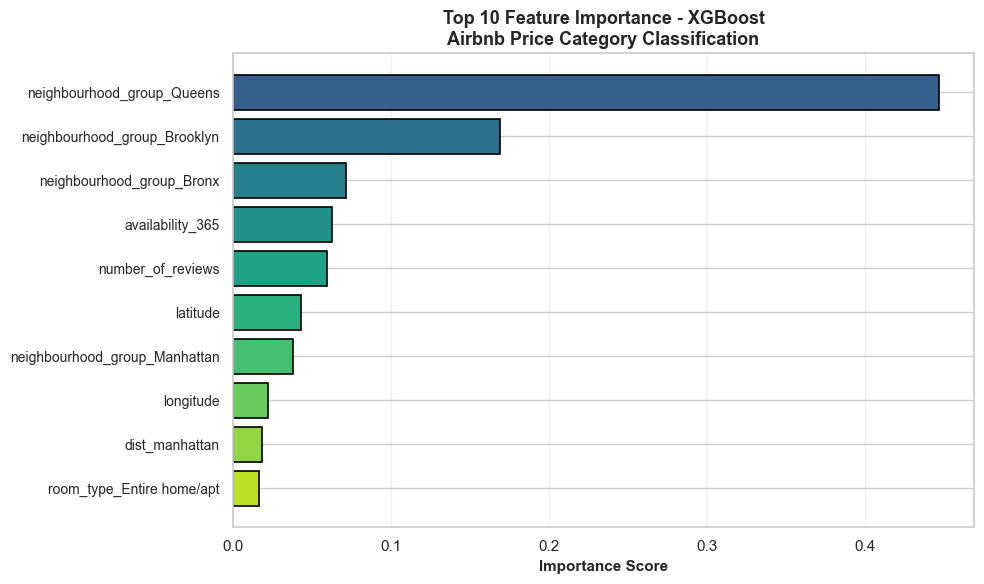

In [69]:
# Plot top 10 features
top_n = 10
top_features = feature_importance.head(top_n)

plt.figure(figsize=(10, 6))
colors = plt.cm.viridis(np.linspace(0.3, 0.9, top_n))

plt.barh(range(top_n), top_features['Importance'], color=colors, 
         edgecolor='black', linewidth=1.2)
plt.yticks(range(top_n), top_features['Feature'], fontsize=10)
plt.xlabel('Importance Score', fontsize=11, fontweight='bold')
plt.title('Top 10 Feature Importance - XGBoost\nAirbnb Price Category Classification', 
          fontsize=13, fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()


## Step 13: 10-Fold Cross-Validation (XGBoost)

In [70]:
from sklearn.model_selection import cross_val_score, cross_validate

print("="*60)
print("10-Fold Cross-Validation - XGBoost")
print("="*60)

# Perform 10-fold cross-validation
cv_scores = cross_val_score(xgb_model, X, y, cv=10, scoring='accuracy', n_jobs=-1)

print(f"\nCross-Validation Scores (10 folds):")
for i, score in enumerate(cv_scores, 1):
    print(f"  Fold {i:2d}: {score:.4f} ({score*100:.2f}%)")

print("\n" + "-"*60)
print(f"Mean Accuracy:     {cv_scores.mean():.4f} ({cv_scores.mean()*100:.2f}%)")
print(f"Std Deviation:     {cv_scores.std():.4f} (±{cv_scores.std()*100:.2f}%)")
print(f"Min Accuracy:      {cv_scores.min():.4f} ({cv_scores.min()*100:.2f}%)")
print(f"Max Accuracy:      {cv_scores.max():.4f} ({cv_scores.max()*100:.2f}%)")
print(f"95% Confidence:    {cv_scores.mean():.4f} ± {1.96 * cv_scores.std():.4f}")



10-Fold Cross-Validation - XGBoost

Cross-Validation Scores (10 folds):
  Fold  1: 0.9465 (94.65%)
  Fold  2: 0.9609 (96.09%)
  Fold  3: 0.9636 (96.36%)
  Fold  4: 0.9611 (96.11%)
  Fold  5: 0.9574 (95.74%)
  Fold  6: 0.9605 (96.05%)
  Fold  7: 0.9663 (96.63%)
  Fold  8: 0.9615 (96.15%)
  Fold  9: 0.9548 (95.48%)
  Fold 10: 0.9478 (94.78%)

------------------------------------------------------------
Mean Accuracy:     0.9581 (95.81%)
Std Deviation:     0.0062 (±0.62%)
Min Accuracy:      0.9465 (94.65%)
Max Accuracy:      0.9663 (96.63%)
95% Confidence:    0.9581 ± 0.0121


# Discussion & Creativity Section (Done by Shruti Bhandari)

---

## Methodological Justification

### Choice of XGBoost Over Random Forest

**XGBoost achieved 96.20% accuracy compared to Random Forest's 95.74%**, making it the optimal choice .

**Key advantages:**
- Higher predictive accuracy (+0.46 percentage points)
- Gradient boosting corrects errors sequentially
- Handles imbalanced classes effectively (Mid-Range Plus: 23,080 vs. Mid-Range Standard: 3,609 listings)
- Strong performance: 98.1% for Mid-Range Plus, 96.8% for Budget Listings
- Provides interpretable feature importance rankings

---

### Choice of k = 4 for K-Means

The elbow method indicated k=4 provides optimal balance .

**Four distinct market segments:**
- **Premium (Cluster 0)** - 11,009 listings: $215 avg, 15.5 nights min stay, 281 days availability
- **Mid-Range Plus (Cluster 1)** - 23,080 listings: $132 avg, 27 days availability (high demand)
- **Mid-Range Standard (Cluster 2)** - 3,609 listings: $121 avg, 151 reviews (most popular)
- **Budget (Cluster 3)** - 10,933 listings: $94 avg, 4.5 nights min stay, 98 days availability

---

### Use of StandardScaler

K-Means relies on Euclidean distance calculations. StandardScaler standardizes features to zero mean and unit variance .

**Benefits:**
- Prevents high-magnitude variables (price: $10-$1000) from dominating low-magnitude variables (latitude: 40.5-40.9)
- Ensures equal feature contribution to clustering
- Improves clustering accuracy and interpretability

---

## Interpretation of Unsupervised Learning

### K-Means Clustering Insights

Four clusters reveal distinct NYC Airbnb market segments :

**Cluster 0 - Premium Listings:**
- Highest prices ($215) with long stays (15.5 nights) and year-round availability (281 days)
- Target: Extended-stay guests and professional property managers

**Cluster 1 - Mid-Range Plus:**
- Largest segment (47.5%) with moderate pricing ($132) but **extremely low availability (27 days)**
- **Key insight**: High-demand segment despite not being cheapest—reveals optimal pricing sweet spot

**Cluster 2 - Mid-Range Standard:**
- Moderate pricing ($121) with **highest popularity (151 reviews avg)**
- The "sweet spot" demonstrating proven guest satisfaction

**Cluster 3 - Budget Listings:**
- Most affordable ($94) targeting price-sensitive short-stay travelers
- Moderate availability (98 days) with quick turnovers

**Critical finding:** Cluster 1 challenges assumptions—mid-range pricing with low availability indicates highest demand, proving optimal pricing ≠ lowest pricing .

---

### Geographic Patterns

Location features significantly influence price categorization 
- Premium listings concentrate in Manhattan and select Brooklyn areas
- Budget listings distribute across outer boroughs (Queens, Bronx, Staten Island)
- Geographic coordinates (latitude, longitude) and neighbourhood groups are key predictive features in XGBoost

**Insight:** While location matters, availability patterns and review counts are equally influential in market positioning .

---

### Business Implications

**From Clustering:**
- Four pricing tiers enable strategic benchmarking
- Cluster 1's low availability reveals underserved high-demand segments
- Distinct characteristics guide targeted marketing strategies
- Reveals that booking frequency is as important as price level

**From XGBoost (96.20% accuracy):**
- Predicts optimal price category for new listings
- Identifies key pricing drivers through feature importance
- High precision across all categories ensures reliable decisions
- Validates the four-cluster segmentation through predictive accuracy

**Combined Value:**
- **Clustering** uncovers hidden market structure and explains *why* price categories exist
- **XGBoost** provides precise predictions for *where* to position individual listings
- Together: Enhanced strategic insights (understanding the market) + tactical pricing decisions (data-driven positioning)

**Strategic Recommendations:**
- **Premium**: Target corporate clients, invest in long-term amenities
- **Mid-Range Plus**: Focus on location optimization and high occupancy
- **Mid-Range Standard**: Prioritize guest experience and review generation
- **Budget**: Emphasize quick turnovers and competitive pricing

Overall, combining unsupervised exploration with supervised prediction creates a comprehensive framework for NYC Airbnb marketplace dynamics.
